# Data

## Data Inormation

This is a data set containing 10 classes of colour images of size 32 × 32 pixels. The training set is perfectly balanced, with 6,000 images per class. The test set contains 10,000 instances. This Note book looks to train an MLP and a CNN for the classification task and compare their performance. 

## Setup

In [1]:
from data_loader import DataLoader
import tensorflow as tf
from tensorflow import keras


### Loading Data

In [2]:
# According to the CIFAR-10 website, the training set is split into five batches
# stored in fives files. Each colour image has dimensions equal to 32 x 32 x 3. There
# are 10 classes.
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# The default values of all the arguments of the load_batch function have been
# set for the CIFAR-10 dataset.
X_train, y_train = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)

In [3]:
from sklearn.model_selection import train_test_split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.15, random_state=42)

C:\Users\jerem\AppData\Local\Temp/ipykernel_10824/382253652.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1500 + 1) instead
  np.random.random_integers(0,len(y_test),20)


array([ 618,  878,  266,  897, 1027, 1367, 1447,   82, 1439, 1319, 1127,
       1339, 1450,  408,  766,  627,  882, 1027,  513, 1239])

#### Sampler

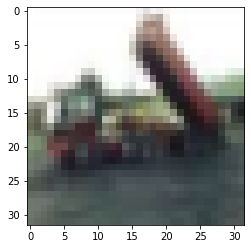

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])


In [65]:
def sampler(X,y, cl_name = class_names,num_portraits=20):
    import matplotlib.pyplot as plt
    from numpy import random as ran
    from matplotlib.pyplot import figure
    random_set = ran.random_integers(0,len(y),num_portraits)
    fig, ax = plt.subplots(4,int(np.ceil(num_portraits/4)),figsize=(15,15))
    i = 0
    for row in ax:
        for col in row:
            
            col.imshow(X[i])
            col.set_title(cl_name[y[i]])
            i+=1

    


#### Train set sample plots

C:\Users\jerem\AppData\Local\Temp/ipykernel_10824/139059451.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 50000 + 1) instead
  random_set = ran.random_integers(0,len(y),num_portraits)


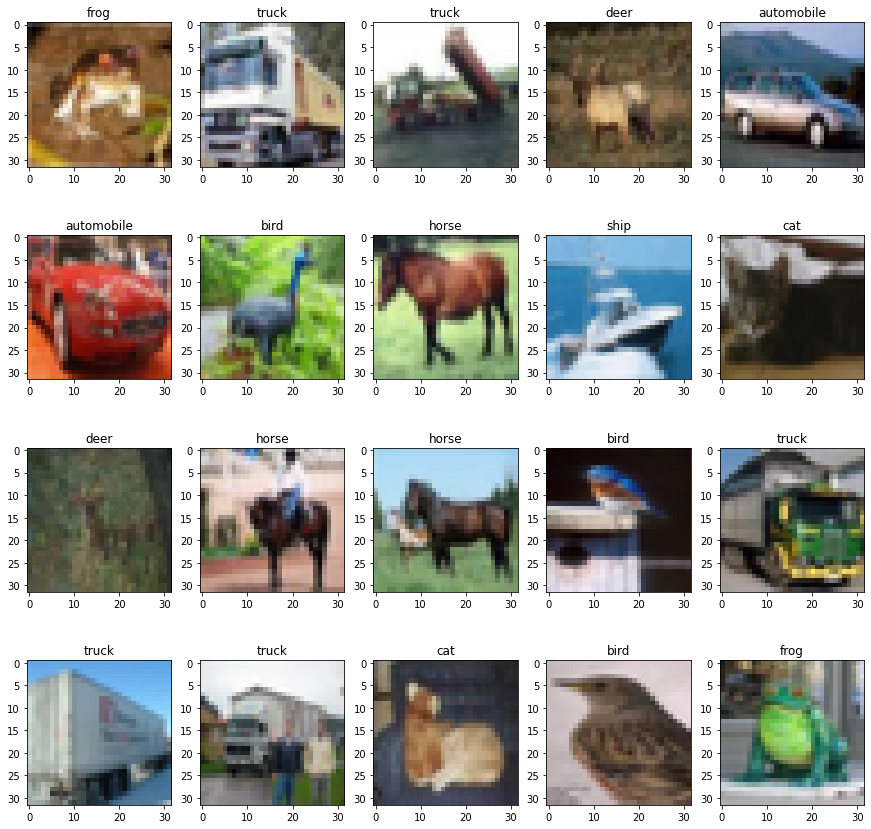

In [66]:
sampler(X_train, y_train )

#### Test sample plots

C:\Users\jerem\AppData\Local\Temp/ipykernel_10824/139059451.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 1500 + 1) instead
  random_set = ran.random_integers(0,len(y),num_portraits)


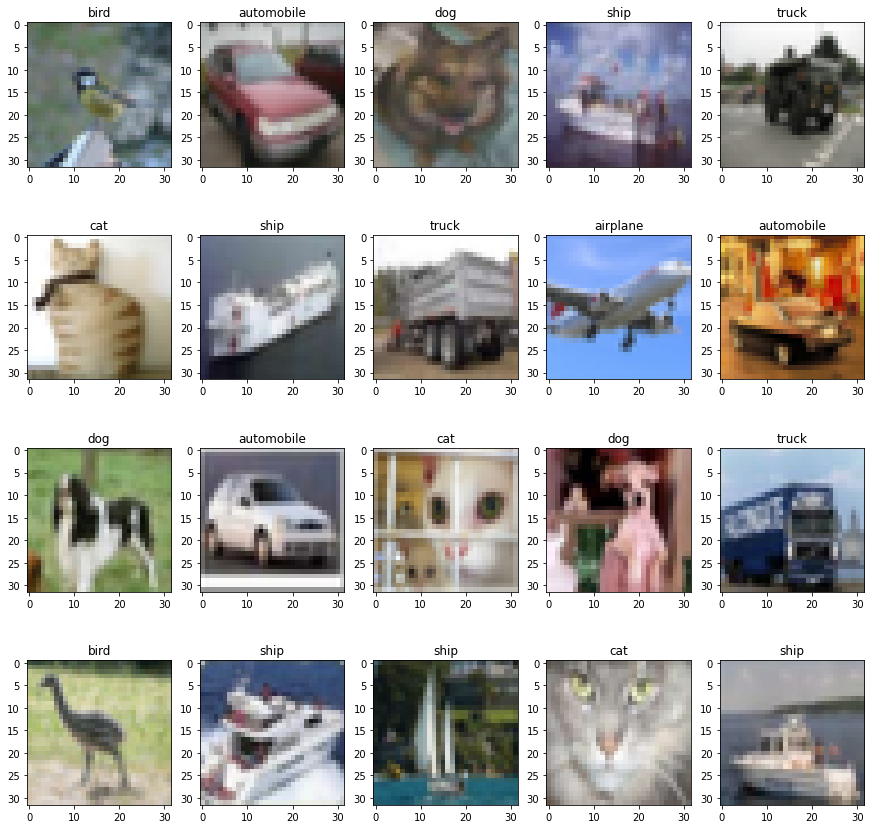

In [67]:
sampler(X_test, y_test )

Validation set sample plots

C:\Users\jerem\AppData\Local\Temp/ipykernel_10824/139059451.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 8500 + 1) instead
  random_set = ran.random_integers(0,len(y),num_portraits)


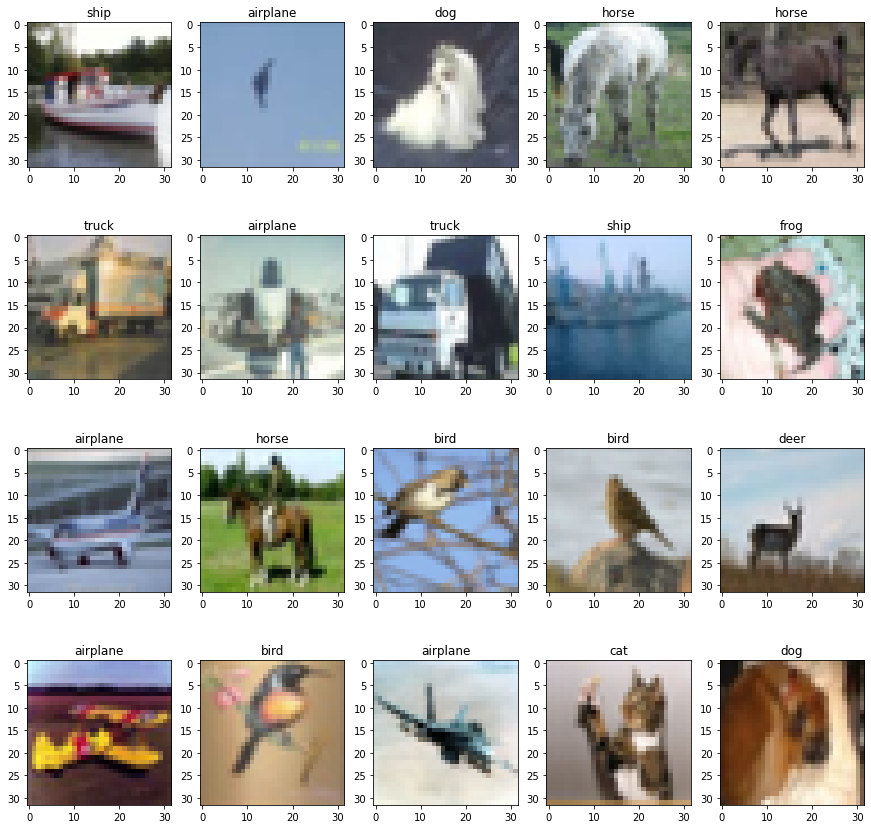

In [68]:
sampler(X_val, y_val )

### Model

#### MLP

In [ ]:
# creating the model
from keras.initializers import glorot_normal, he_normal

def exponential_decay(lr0, s):
    def exp_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exp_decay_fn


my_exp_decay_fn = exponential_decay(lr0=0.01, s=20)
lr_scheduler = keras.callbacks.LearningRateScheduler(my_exp_decay_fn)
history = model.fit(X_train, y_train, ..., callbacks=[lr_scheduler])

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
model = keras.models.Sequential(
    [
    model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
    ]
)

